# All Lyrics

In [1714]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import squarify # pip install squarify
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px # Requires: pip install plotly


In [1715]:
file_path = '/Users/meredithsmith/Desktop/TØPAnalysis/Alltøplyrics.xlsx'
df = pd.read_excel(file_path)

In [1716]:
df.head()

,Unnamed: 0,album_release_date,album_release_year,Unnamed: 3,time_signature,minssecs,secs,duration_ms,track_name,track_number,...,album_name,key_name,mode_name,key_mode,Lyrics,Lyric source,Header,Count A,Unnamed: 19,Unnamed: 20
0,1,2025-09-12,2025,22.0,0.366667,5.37,322.0,322000.0,City Walls,1.0,...,Breach,NaN,NaN,NaN,"Square up with me, I can take your right, thro...",NaN,Data,1,NaN,NaN
1,2,2025-09-12,2025,22.0,0.366667,3.37,202.0,202000.0,Rawfear,2.0,...,Breach,NaN,NaN,NaN,"Raw fear\nRaw fear\n\nRaw fear moves me, sound...",NaN,Data,NaN,NaN,NaN
2,3,2025-09-12,2025,23.0,0.383333,3.38,203.0,203000.0,Drum Show,3.0,...,Breach,NaN,NaN,NaN,Puttin' on a drum show\nOoh-ooh\n\n[Verse 1: T...,NaN,Data,NaN,NaN,NaN
3,4,2025-09-12,2025,16.0,0.266667,3.27,196.0,196000.0,Garbage,4.0,...,Breach,NaN,NaN,NaN,I didn't do it\n\nI feel like garbage\nI feel ...,NaN,Data,NaN,NaN,NaN
4,5,2025-09-12,2025,45.0,0.750000,3.75,225.0,225000.0,The Contract,5.0,...,Breach,NaN,NaN,NaN,"I check the doors, check the windows and pull ...",NaN,Data,NaN,NaN,NaN


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meredithsmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/meredithsmith/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average Sentiment by Album:
 album_name
Breach: Digital Remains      -0.921800
Twenty One Pilots            -0.313043
Vessel (with Bonus Tracks)   -0.229533
Trench                       -0.173700
Vessel                       -0.080615
No Phun Intended              0.000000
Blurryface                    0.026714
Clancy                        0.135700
Breach                        0.219154
Scaled And Icy                0.829709
Name: Sentiment_Score, dtype: float64


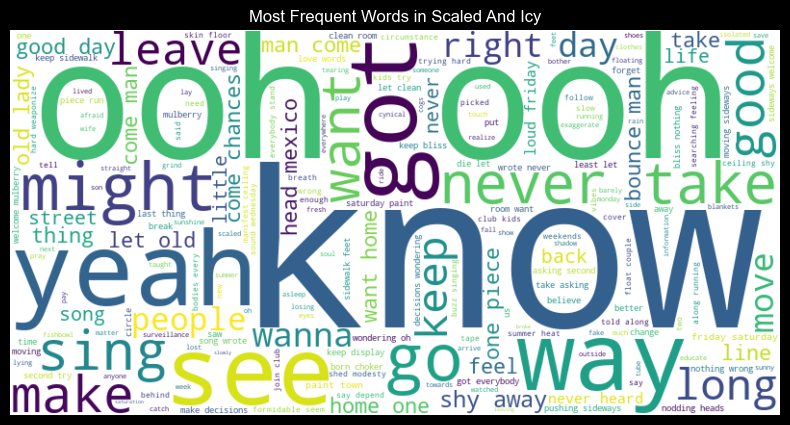

In [1717]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('vader_lexicon')

# 2. Text Preprocessing
stop_words = set(stopwords.words('english'))

def clean_lyrics(text):
    # Lowercase and remove non-alphabetic characters
    words = str(text).lower().split()
    clean_words = [w for w in words if w.isalpha() and w not in stop_words]
    return " ".join(clean_words)

df['Clean_Lyrics'] = df['Lyrics'].apply(clean_lyrics)

# 3. Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = df['Lyrics'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# 4. Group by Album for Analysis
album_sentiment = df.groupby('album_name')['Sentiment_Score'].mean().sort_values()
print("Average Sentiment by Album:\n", album_sentiment)

# 5. Visualize: Word Cloud for the most positive album
top_album = album_sentiment.idxmax()
text = " ".join(df[df['album_name'] == top_album]['Clean_Lyrics'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f"Most Frequent Words in {top_album}")
plt.axis('off')
plt.show()

In [1718]:
stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "he", "him", "his", "she", "her", "it", "its", "they", "them",
    "their", "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has",
    "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
    "for", "with", "about", "against", "between", "into", "through", "during",
    "before", "after", "above", "below", "to", "from", "up", "down", "in",
    "out", "on", "off", "over", "under", "again", "further", "then", "once", "not", "no", "yes", "so", "can", "just", "wanted", "where",
    "dont", "yeah", "let", "im", "ah", "want", "like", "ive", "all", "ooh", "ill", "even", "forforforforforfor", "every", "hoohoohoo", "hell",
    "yeahyeahyeahyeah", "daisychained", "thats", "there", "how", "somehow", "when", "used", "cant", "chorus", "lada"
]

# Function to remove stop words from a string
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

In [1719]:
df.info


<bound method DataFrame.info of      Unnamed: 0 album_release_date  album_release_year  Unnamed: 3  \
0             1         2025-09-12                2025        22.0   
1             2         2025-09-12                2025        22.0   
2             3         2025-09-12                2025        23.0   
3             4         2025-09-12                2025        16.0   
4             5         2025-09-12                2025        45.0   
..          ...                ...                 ...         ...   
111         112                NaT                2007         NaN   
112         113                NaT                2007         NaN   
113         114                NaT                2007         NaN   
114         115                NaT                2007         NaN   
115         116                NaT                2007         NaN   

     time_signature  minssecs   secs  duration_ms             track_name  \
0          0.366667      5.37  322.0     322000.0  

In [1720]:
df.shape

(116, 23)

In [1721]:
# Create a new DataFrame containing only songs from the album "Breach"
df_breach = df[df["album_name"] == "Breach"][["album_name", "track_name", "Lyrics"]]
df_clancy = df[df["album_name"] == "Clancy"][["album_name", "track_name", "Lyrics"]]
df_sai = df[df["album_name"] == "Scaled And Icy"][["album_name", "track_name", "Lyrics"]]
df_trench = df[df["album_name"] == "Trench"][["album_name", "track_name", "Lyrics"]]
df_blurryface = df[df["album_name"] == "Blurryface"][["album_name", "track_name", "Lyrics"]]
df_vessel = df[df["album_name"] == "Vessel"][["album_name", "track_name", "Lyrics"]]
df_self_titled = df[df["album_name"] == "Twenty One Pilots"][["album_name", "track_name", "Lyrics"]]
# To see the first few rows of your filtered data:
print(df_breach.head())

  album_name    track_name                                             Lyrics
0     Breach    City Walls  Square up with me, I can take your right, thro...
1     Breach       Rawfear  Raw fear\nRaw fear\n\nRaw fear moves me, sound...
2     Breach     Drum Show  Puttin' on a drum show\nOoh-ooh\n\n[Verse 1: T...
3     Breach       Garbage  I didn't do it\n\nI feel like garbage\nI feel ...
4     Breach  The Contract  I check the doors, check the windows and pull ...


In [1722]:
# 1. Define the list of albums you want to analyze
target_albums = [
    "Breach", "Clancy", "Scaled And Icy", "Trench",
    "Blurryface", "Vessel", "Twenty One Pilots"
]

# 2. Filter the main DataFrame for these albums and specific columns
df_combined = df[df["album_name"].isin(target_albums)][["album_name", "track_name", "Lyrics"]]

# 3. Check the results
print(df_combined["album_name"].unique())
print(df_combined.shape)

['Breach' 'Clancy' 'Scaled And Icy' 'Trench' 'Blurryface' 'Vessel'
 'Twenty One Pilots']
(92, 3)


In [1723]:
print(df['track_name'].unique())

['City Walls' 'Rawfear' 'Drum Show' 'Garbage' 'The Contract' 'Downstairs'
 'Robot Voices' 'Center Mass' 'Cottonwood' 'One Way' 'Days Lie Dormant'
 'Tally' 'Intentions' 'Drag Path' 'The Line' 'Overcompensate'
 'Next Semester' 'Backslide' 'Midwest Indigo' 'Routines in the Night'
 'Vignette' "The Craving (Jenna's Version)" 'Lavish' 'Navigating'
 'Snap Back' 'Oldies Station' 'At the Risk of Filling Dumb'
 'Paladin Street' 'Good Day' 'Choker' 'Shy Away' 'The Outside' 'Saturday'
 'Never Take It' 'Mulberry Street' 'Formidable' 'Bounce Man' 'No Chances'
 'Redecorate' 'Jumpsuit' 'Levitate' 'Morph' 'My Blood' 'Chlorine'
 'Smithereens' 'Neon Gravestones' 'The Hype' 'Nico and the Niners'
 'Cut My Lip' 'Bandito' 'Pet Cheetah' 'Legend' 'Leave the City'
 'Heavydirtysoul' 'Stressed Out' 'Ride' 'Fairly Local' 'Tear in My Heart'
 'Lane Boy' 'The Judge' 'Doubt' 'Polarize' "We Don't Believe What's on TV"
 'Message Man' 'Hometown' 'Not Today' 'Goner' 'Ode to Sleep'
 'Holding on to You' 'Migraine' 'House of

In [1724]:
# List of the albums you want
target_albums = [
    "Breach", "Clancy", "Scaled And Icy", "Trench",
    "Blurryface", "Vessel", "Twenty One Pilots"
]

# Create a dictionary where the key is the album name and the value is its dataframe
albums = {name: df[df["album_name"] == name][["track_name", "Lyrics"]] for name in target_albums}

# How to use it:
# albums["Vessel"] now holds just the Vessel data
print(albums["Vessel"].head())

           track_name                                             Lyrics
67       Ode to Sleep  I wake up fine and dandy but then by the time ...
68  Holding on to You  I'm taking over my body,\nBack in control, no ...
69           Migraine  Am I the only one I know\nWaging my wars behin...
70      House of Gold  She asked me, Son, when I grow old,\nWill you ...
71          Car Radio  I ponder of something great My lungs will fill...


# Create a clean DataFrame for the whole album
all_albums = [Breach, Clancy, ScaledAndIcy, Trench, Blurryface, Vessel, Twenty_One_Pilots]  # List of your lyric variables
# 3. Combine with your song names (if you have them in a list)
album_names = ["Breach", "Clancy", "ScaledAndIcy", "Trench", "Blurryface", "Vessel", "Twenty_One_Pilots"] # Add all 14 names
df_AlbumTopics['Album_Name'] = song_names[:len(df_topics)]
df_all_albums = pd.DataFrame({
    'Album_Name': album_names,
    'Album_Lyrics': all_albums
})

### Create all_processed_words list

In [1725]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords

# 1. Setup: Load stopwords (words like 'the', 'and', 'is' that we want to ignore)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Optional: Add custom "filler" words common in songs
stop_words.update(['yeah', 'oh', 'ooh', 'woah', 'la', 'na'])

# 2. Define your target albums
target_albums = [
    "Breach", "Clancy", "Scaled And Icy", "Trench",
    "Blurryface", "Vessel", "Twenty One Pilots"
]

# 3. Process each album in a loop
album_themes = {}

for album in target_albums:
    # Filter for the current album
    # Note: Use 'Lyrics' or 'lyrics' depending on your exact column name
    album_df = df[df["album_name"] == album]

    # Combine all lyrics from this album into one big string
    all_text = " ".join(album_df["Lyrics"].astype(str)).lower()

    # Clean the text: keep only words, remove stopwords
    words = [word for word in all_text.split() if word.isalpha() and word not in stop_words]

    # Count the most common words (Themes)
    top_words = Counter(words).most_common(10)

    # Store the results in our dictionary
    album_themes[album] = top_words

# 4. Display the results
for album, themes in album_themes.items():
    print(f"\n--- Top Themes for {album} ---")
    for word, count in themes:
        print(f"{word}: {count}")


--- Top Themes for Breach ---
slowing: 32
one: 28
know: 24
want: 24
feel: 24
time: 23
never: 21
even: 19
like: 18
take: 17

--- Top Themes for Clancy ---
head: 24
time: 22
way: 22
know: 17
snap: 17
keep: 16
drop: 16
let: 15
even: 15
make: 14

--- Top Themes for Scaled And Icy ---
know: 34
like: 26
never: 24
take: 20
keep: 20
want: 19
get: 18
one: 16
got: 15
let: 15

--- Top Themes for Trench ---
know: 75
need: 34
go: 32
pet: 32
run: 23
get: 23
keep: 22
let: 21
one: 20
someone: 20

--- Top Themes for Blurryface ---
know: 44
bah: 40
help: 34
time: 29
save: 26
think: 24
good: 22
better: 19
one: 18
used: 18

--- Top Themes for Vessel ---
take: 33
know: 33
trying: 25
broken: 25
say: 21
wanna: 20
one: 18
make: 18
fake: 18
tell: 17

--- Top Themes for Twenty One Pilots ---
fall: 29
away: 22
know: 20
chorus: 19
get: 19
wanna: 14
take: 14
follow: 12
johnny: 12
time: 11


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meredithsmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### LDA training code

In [1726]:
import nltk
from nltk.corpus import stopwords
import gensim
from gensim import corpora
import re

# List of your album dataframes
album_list = [df_breach, df_clancy, df_sai, df_trench, df_blurryface, df_vessel, df_self_titled]
album_names = ["Breach", "Clancy", "Scaled And Icy", "Trench", "Blurryface", "Vessel", "Self Titled"]

# 1. Download if you haven't already
nltk.download('stopwords')

# 2. CREATE A NEW SET from the stopwords (This is the fix)
stop_words = set(stopwords.words('english'))

# 3. Now .update() will work perfectly
extra_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "he", "him", "his", "she", "her", "it", "its", "they", "them",
    "their", "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has",
    "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
    "for", "with", "about", "against", "between", "into", "through", "during",
    "before", "after", "above", "below", "to", "from", "up", "down", "in",
    "out", "on", "off", "over", "under", "again", "further", "then", "once", "not", "no", "yes", "so", "can", "just", "wanted", "where",
    "dont", "yeah", "let", "im", "ah", "want", "like", "ive", "all", "ooh", "ill", "even", "forforforforforfor", "every", "hoohoohoo", "hell", "get", "chorus", "johnny"
    "yeahyeahyeahyeah", "daisychained", "thats", "there", "how", "somehow", "when", "used", "cant"]
stop_words.update(extra_words)

print(f"Stopwords prepared. Total count: {len(stop_words)}")

Stopwords prepared. Total count: 223


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meredithsmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1727]:
def preprocess(text):
    # Clean: remove punctuation, lowercase, and split into words
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    return [word for word in text.split() if word not in stop_words and len(word) > 2]

# Dictionary to store results for each album
all_album_topics = {}

for name, album_df in zip(album_names, album_list):
    # Process each song individually
    processed_songs = [preprocess(s) for s in album_df["Lyrics"].astype(str)]

    # Create dictionary from the list of lists
    dictionary = corpora.Dictionary(processed_songs)

    # Create corpus from the list of lists
    corpus = [dictionary.doc2bow(song) for song in processed_songs]

    # Train LDA...
    lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3)
    all_album_topics[name] = lda_model.print_topics(-1)

In [1728]:
import gensim
from gensim import corpora

# 1. Create the Dictionary
# This maps every unique word to an ID
dictionary = corpora.Dictionary(processed_songs)

# 2. Create the Corpus
# This converts each song into a "Bag of Words" format (word_id, frequency)
corpus = [dictionary.doc2bow(text) for text in processed_songs]

# 3. Train the LDA Model
# We use 3 topics because 14 songs is a smaller sample size
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    random_state=100,
    update_every=1,
    chunksize=10, # Adjusted for your 14 songs
    passes=20,    # Increased passes to help the model find patterns in a small dataset
    alpha='auto'
)

# 4. Show the discovered Topics
print("--- Discovered Lyrical Themes ---")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}\n")

--- Discovered Lyrical Themes ---
Topic 0: 0.029*"lada" + 0.015*"away" + 0.014*"said" + 0.012*"please" + 0.011*"fly" + 0.011*"afraid" + 0.011*"mind" + 0.010*"youre" + 0.010*"soul" + 0.010*"saw"

Topic 1: 0.035*"fall" + 0.014*"havent" + 0.014*"follow" + 0.014*"wanna" + 0.013*"away" + 0.012*"instead" + 0.010*"drop" + 0.010*"water" + 0.010*"cause" + 0.010*"found"

Topic 2: 0.018*"know" + 0.016*"boy" + 0.016*"johnny" + 0.015*"youre" + 0.012*"cause" + 0.012*"reign" + 0.011*"joy" + 0.011*"pride" + 0.011*"destroy" + 0.010*"eyes"



In [1729]:
# Create the mapping based on your results
topic_labels = {
    0: "Vulnerability & Flight",
    1: "Anxiety & Internal Dialogue",
    2: "Nostalgia & Character Narrative"
}

print("--- Final Lyrical Analysis ---")
for idx, topic in lda_model.print_topics(-1):
    label = topic_labels.get(idx, "Unknown Theme")
    # Clean the topic string for better readability
    clean_words = ", ".join([word.split("*")[1].replace('"', '') for word in topic.split(" + ")])

    print(f"THEME: {label}")
    print(f"Keywords: {clean_words}\n")

--- Final Lyrical Analysis ---
THEME: Vulnerability & Flight
Keywords: lada, away, said, please, fly, afraid, mind, youre, soul, saw

THEME: Anxiety & Internal Dialogue
Keywords: fall, havent, follow, wanna, away, instead, drop, water, cause, found

THEME: Nostalgia & Character Narrative
Keywords: know, boy, johnny, youre, cause, reign, joy, pride, destroy, eyes



### Topic Model

In [1730]:
import gensim
from gensim import corpora

# 1. Create the Dictionary
# This maps every unique word to a unique ID
dictionary = corpora.Dictionary(all_processed_words)

# 2. Create the Corpus
# This converts each song into a list of (word_id, word_frequency)
corpus = [dictionary.doc2bow(text) for text in all_processed_words]

# 3. Train the LDA Model
# We use 5 topics as a starting point for 14 songs
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=100,
    passes=20,     # More passes help with small datasets
    alpha='auto',  # Let the model learn the topic distribution
    per_word_topics=True
)

# 4. Display the Topics and their Top Words
print("--- Discovered Lyrical Themes ---")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}\n")

--- Discovered Lyrical Themes ---
Topic 0: 0.039*"waste" + 0.032*"lie" + 0.032*"dormant" + 0.032*"days" + 0.025*"time" + 0.025*"cant" + 0.021*"cause" + 0.021*"afford" + 0.018*"say" + 0.018*"dont"

Topic 1: 0.051*"way" + 0.039*"one" + 0.034*"feel" + 0.032*"even" + 0.022*"know" + 0.021*"thats" + 0.020*"used" + 0.016*"want" + 0.016*"dont" + 0.016*"keep"

Topic 2: 0.023*"time" + 0.023*"somehow" + 0.021*"hoohoohoo" + 0.019*"believe" + 0.018*"dont" + 0.018*"entertain" + 0.016*"two" + 0.014*"glued" + 0.014*"every" + 0.014*"still"

Topic 3: 0.060*"never" + 0.052*"slowing" + 0.039*"ah" + 0.024*"like" + 0.020*"find" + 0.018*"ill" + 0.018*"fear" + 0.018*"raw" + 0.015*"im" + 0.015*"forever"

Topic 4: 0.029*"im" + 0.021*"right" + 0.016*"take" + 0.015*"hiding" + 0.015*"heart" + 0.013*"aim" + 0.013*"part" + 0.012*"ohoh" + 0.010*"believe" + 0.010*"want"



### Define lexicons

In [1731]:
faith_words = ['faith', 'believe', 'god', 'pray', 'lord', 'creator', 'church', 'soul', 'spirit', 'halo', 'jesus', "lion", "holy"]
hope_words = ['hope', "love" 'hopeful', 'holding','light', 'morning', 'sun', 'sky', 'alive', 'stay', 'future', 'hold', 'better', "friends"]
word_words = ["flesh", "den", "mind"]

### The Analysis Code

In [1732]:
def count_keywords(text, lexicon):
    words = str(text).lower().split()
    return sum(1 for word in words if word in lexicon)

# Apply the counting to your combined DataFrame
df_combined['Faith_Count'] = df_combined['Lyrics'].apply(lambda x: count_keywords(x, faith_words))
df_combined['Hope_Count'] = df_combined['Lyrics'].apply(lambda x: count_keywords(x, hope_words))
df_combined['Word_Count'] = df_combined['Lyrics'].apply(lambda x: count_keywords(x, hope_words))

# Calculate the most "Faithful" and "Hopeful" songs
top_faith_songs = df_combined.nlargest(5, 'Faith_Count')[['album_name', 'track_name', 'Faith_Count']]
top_hope_songs = df_combined.nlargest(5, 'Hope_Count')[['album_name', 'track_name', 'Hope_Count']]
top_word_songs = df_combined.nlargest(5, 'Word_Count')[['album_name', 'track_name', 'Word_Count']]
print("--- Top 5 Songs for Faith ---")
print(top_faith_songs)
print("\n--- Top 5 Songs for Hope ---")
print(top_hope_songs)
print("\n--- Top 5 Songs for Word ---")
print(top_word_songs)

--- Top 5 Songs for Faith ---
        album_name         track_name  Faith_Count
11          Breach              Tally           11
46          Trench           The Hype           11
68          Vessel  Holding on to You            9
48          Trench         Cut My Lip            6
28  Scaled And Icy           Good Day            5

--- Top 5 Songs for Hope ---
    album_name         track_name  Hope_Count
61  Blurryface           Polarize          19
42      Trench           My Blood          15
68      Vessel  Holding on to You           9
52      Trench     Leave the City           8
58  Blurryface           Lane Boy           8

--- Top 5 Songs for Word ---
    album_name         track_name  Word_Count
61  Blurryface           Polarize          19
42      Trench           My Blood          15
68      Vessel  Holding on to You           9
52      Trench     Leave the City           8
58  Blurryface           Lane Boy           8


### Aggregate by album

In [1733]:
# Group by album and calculate the average occurrences
album_trends = df_combined.groupby('album_name')[['Faith_Count', 'Hope_Count']].mean()

# Sort by Faith to see which album leads
print("\n--- Theme Density by Album ---")
print(album_trends.sort_values(by='Faith_Count', ascending=False))


--- Theme Density by Album ---
                   Faith_Count  Hope_Count
album_name                                
Vessel                1.923077    2.923077
Trench                1.571429    2.142857
Breach                1.230769    1.461538
Twenty One Pilots     1.214286    1.500000
Scaled And Icy        0.727273    0.454545
Blurryface            0.500000    3.785714
Clancy                0.000000    1.692308


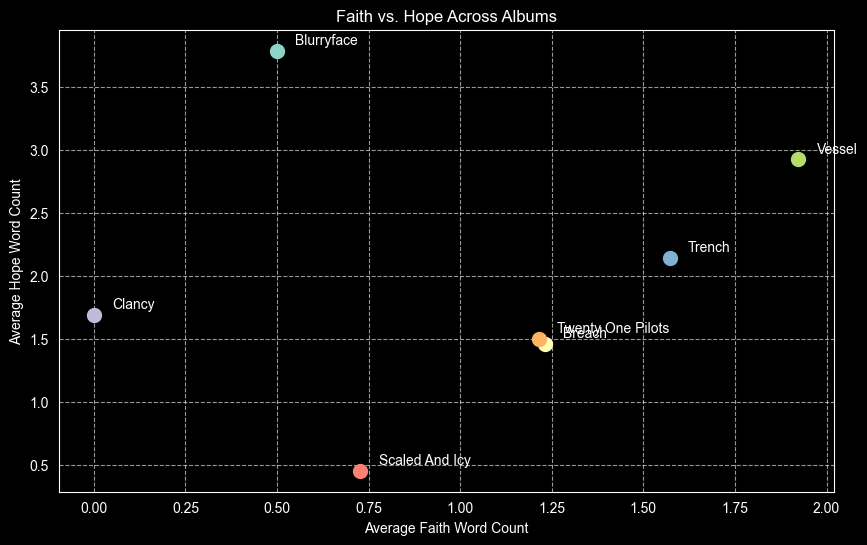

In [1734]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for i, album in enumerate(album_trends.index):
    plt.scatter(album_trends.loc[album, 'Faith_Count'],
                album_trends.loc[album, 'Hope_Count'],
                label=album, s=100)
    plt.text(album_trends.loc[album, 'Faith_Count']+0.05,
             album_trends.loc[album, 'Hope_Count']+0.05, album)

plt.title("Faith vs. Hope Across Albums")
plt.xlabel("Average Faith Word Count")
plt.ylabel("Average Hope Word Count")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [1735]:
# Assuming 'df_92' is your combined dataframe of 92 songs
# We create a list of processed songs (list of lists)
import re

def clean_lyric(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    return [word for word in text.split() if word not in stop_words and len(word) > 2]

# This creates a list of 92 lists, one for each song
all_processed_songs = [clean_lyric(s) for s in df_combined["Lyrics"]]

In [1736]:
from gensim import corpora
import gensim

# 1. Create the Dictionary based on all 92 songs
dictionary = corpora.Dictionary(all_processed_songs)

# 2. Create the Corpus (Bag of Words) for all 92 songs
corpus = [dictionary.doc2bow(text) for text in all_processed_songs]

# 3. Train the LDA Model on the full corpus
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,  # You can increase this since you have more data now
    random_state=100,
    passes=15
)

In [1737]:
def get_dominant_topic(ldamodel, corpus):
    topic_data = []
    for i, row in enumerate(ldamodel[corpus]):
        # Sort topics by probability
        topics = sorted(row, key=lambda x: x[1], reverse=True)
        topic_num, prop_topic = topics[0]
        topic_data.append([int(topic_num), round(prop_topic, 4)])
    return pd.DataFrame(topic_data, columns=['Dominant_Topic', 'Topic_Perc_Contribution'])

# This now has 92 rows
df_topics = get_dominant_topic(lda_model, corpus)

# Attach metadata from the original 92-song dataframe
df_topics['Song_Name'] = df_combined['track_name'].values
df_topics['Album'] = df_combined['album_name'].values

# Map your labels
df_topics['Topic_Label'] = df_topics['Dominant_Topic'].map(topic_labels)

### Quantify the vibe of each song

In [1738]:
# 1. Combine all your albums into one Master DataFrame first
# This ensures we have all 92 songs in the correct order
all_albums_df = pd.concat([
    df_self_titled, df_vessel, df_blurryface,
    df_trench, df_sai, df_clancy, df_breach
]).reset_index(drop=True)

# 2. Get your topic dataframe (the one with 92 rows)
df_topics = get_dominant_topic(lda_model, corpus)

# 3. Match the names by using the index of the Master DataFrame
# This will assign the correct name to all 92 rows automatically
df_topics['Song_Name'] = all_albums_df['track_name']
df_topics['Album'] = all_albums_df['album_name']

# 4. Apply your labels
topic_labels = {
    0: "Faith & Resilience",
    1: "Emotional Exposure",
    2: "Search for Truth",
    3: "Wasted Time",
    4: "Path & Purpose"
}
df_topics['Topic_Label'] = df_topics['Dominant_Topic'].map(topic_labels)

# Display the top of your 92-song list
print(df_topics[['Album', 'Song_Name', 'Topic_Label']].head(20))

                Album                  Song_Name         Topic_Label
0   Twenty One Pilots  Implicit Demand For Proof         Wasted Time
1   Twenty One Pilots                  Fall Away  Faith & Resilience
2   Twenty One Pilots              The Pantaloon         Wasted Time
3   Twenty One Pilots          Addict With A Pen  Emotional Exposure
4   Twenty One Pilots             Friend, Please         Wasted Time
5   Twenty One Pilots           March To The Sea  Emotional Exposure
6   Twenty One Pilots                 Johnny Boy    Search for Truth
7   Twenty One Pilots             Oh Ms Believer  Emotional Exposure
8   Twenty One Pilots                Air Catcher      Path & Purpose
9   Twenty One Pilots                   Trapdoor      Path & Purpose
10  Twenty One Pilots    A Car, A Torch, A Death    Search for Truth
11  Twenty One Pilots                   Taxi Cab    Search for Truth
12  Twenty One Pilots  Before You Start Your Day    Search for Truth
13  Twenty One Pilots   Isle Of Fl

In [1739]:
print(f"Songs in Master DF: {len(all_albums_df)}")
print(f"Songs processed by LDA: {len(df_topics)}")
# These two numbers MUST be the same.

Songs in Master DF: 92
Songs processed by LDA: 92


In [1740]:
# Look for songs that have 0 words after cleaning
empty_songs = [i for i, text in enumerate(all_processed_words) if len(text) == 0]
if empty_songs:
    print(f"Warning: Songs at indices {empty_songs} are empty after preprocessing.")

Discovered Lyrical Themes
Topic 0: Persistent Reminiscing Focuses on the passage of time, keeping score of past hurts ("tally," "track," "replay"), and the struggle to "believe" while feeling "lost" in heartbreak.

Topic 1: Unfiltered Vulnerability Centers on raw emotions and internal conflict, specifically the refusal to slow down despite "fear" and the "raw" feeling of "hiding" one's heart.

Topic 2: Searching for Proof Reflects a quest for clarity or "evidence," using imagery of things being "etched" on the "surface" to "find" or "know" the truth.

Topic 3: Regret and Stagnation Deals with the anxiety of "wasting" time and "days" lying "dormant," highlighting the realization that one cannot "afford" to let more time slip away.

Topic 4: Direction and Intent Explores the path forward ("way") and the internal "intentions" or "aim" behind one's actions, balancing "right" and "will."

In [1741]:
# Create a new column for the descriptive label
df_topics['Topic_Label'] = df_topics['Dominant_Topic'].map(topic_labels)

# Displaying the final organized table
print(df_topics[['Song_Name', 'Topic_Label', 'Topic_Perc_Contribution']])

                    Song_Name         Topic_Label  Topic_Perc_Contribution
0   Implicit Demand For Proof         Wasted Time                   0.9954
1                   Fall Away  Faith & Resilience                   0.9967
2               The Pantaloon         Wasted Time                   0.9948
3           Addict With A Pen  Emotional Exposure                   0.9899
4              Friend, Please         Wasted Time                   0.9949
..                        ...                 ...                      ...
87                 Cottonwood    Search for Truth                   0.9930
88                    One Way  Emotional Exposure                   0.9937
89           Days Lie Dormant      Path & Purpose                   0.9953
90                      Tally  Emotional Exposure                   0.9876
91                 Intentions      Path & Purpose                   0.9941

[92 rows x 3 columns]


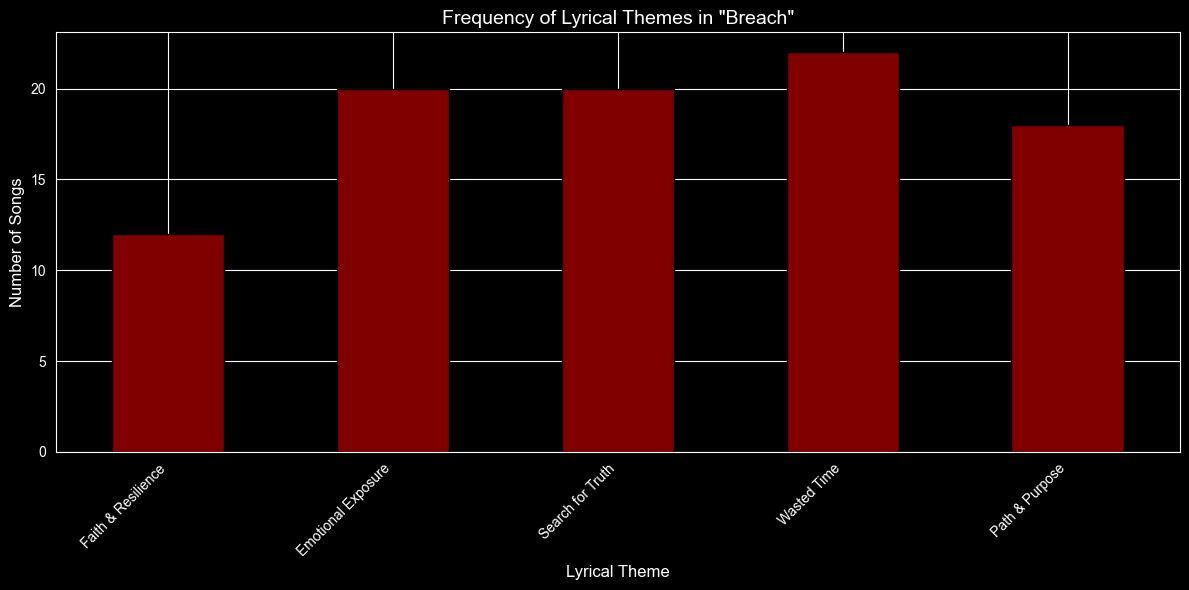

In [1742]:
import matplotlib.pyplot as plt

# 1. Ensure the mapping is applied (if not already done)

df_topics['Topic_Label'] = df_topics['Dominant_Topic'].map(topic_labels)

# 2. Count the occurrences of each label
# We use the list of values from our dictionary to keep the 0-4 order
ordered_labels = [topic_labels[i] for i in range(5)]
topic_counts = df_topics['Topic_Label'].value_counts().reindex(ordered_labels).fillna(0)

# 3. Create the bar chart
plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar', color='maroon', edgecolor='black')

plt.title('Frequency of Lyrical Themes in "Breach"', fontsize=14)
plt.xlabel('Lyrical Theme', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)

# Set the x-ticks to your specific labels
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

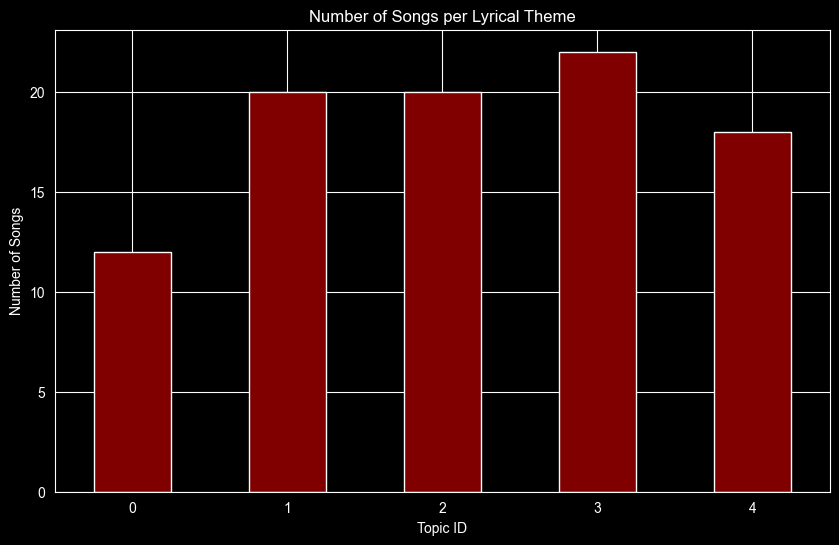

In [1743]:
import matplotlib.pyplot as plt

# Count how many songs fall into each topic
topic_counts = df_topics['Dominant_Topic'].value_counts().sort_index()

# Simple bar chart
plt.figure(figsize=(10,6))
topic_counts.plot(kind='bar', color='maroon')
plt.title('Number of Songs per Lyrical Theme')
plt.xlabel('Topic ID')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.show()

In [1744]:
# Calculate how many songs in each album fall under each theme
album_summary = df_topics.groupby(['Album', 'Topic_Label']).size().unstack(fill_value=0)

# Normalize to see percentages instead of counts
album_pct = album_summary.div(album_summary.sum(axis=1), axis=0) * 100
print(album_pct)

Topic_Label        Emotional Exposure  Faith & Resilience  Path & Purpose  \
Album                                                                       
Blurryface                   0.000000           14.285714       28.571429   
Breach                      23.076923           23.076923       30.769231   
Clancy                      46.153846           30.769231        7.692308   
Scaled And Icy              18.181818            9.090909       36.363636   
Trench                      21.428571            7.142857       14.285714   
Twenty One Pilots           21.428571            7.142857       14.285714   
Vessel                      23.076923            0.000000        7.692308   

Topic_Label        Search for Truth  Wasted Time  
Album                                             
Blurryface                21.428571    35.714286  
Breach                     7.692308    15.384615  
Clancy                    15.384615     0.000000  
Scaled And Icy            27.272727     9.090909  


### Thematic Evolution Stacked

In [1745]:
# Create the chronological mapping
release_dates = {
    "Twenty One Pilots": 2009,
    "Regional at Best": 2011,
    "Vessel": 2013,
    "Blurryface": 2015,
    "Trench": 2018,
    "Scaled And Icy": 2021,
    "Clancy": 2024,
    "Breach": 2025  # Adjust based on your specific dataset context
}

# Add a numeric sort column to your dataframe
df_combined['Release_Year'] = df_combined['album_name'].map(release_dates)

# Sort the dataframe permanently
df_combined = df_combined.sort_values(by=['Release_Year', 'album_name']).reset_index(drop=True)

<Axes: xlabel='Album'>

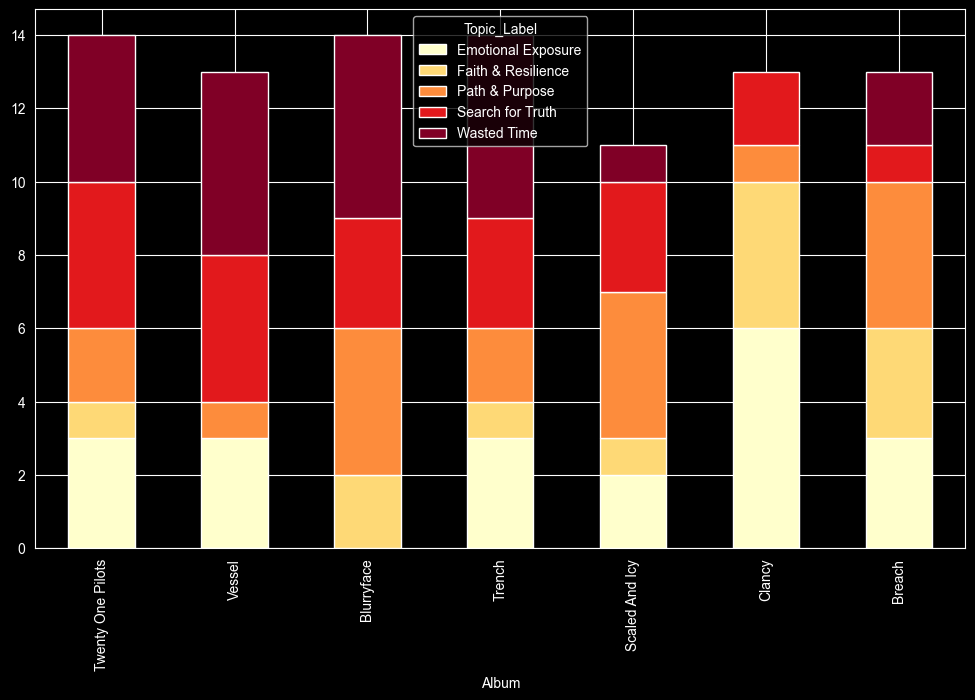

In [1746]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-order the pivot table index using the release_dates keys
ordered_albums = [a for a in release_dates.keys() if a in df_topics['Album'].unique()]

theme_dist = df_topics.groupby(['Album', 'Topic_Label']).size().unstack(fill_value=0)
theme_dist = theme_dist.reindex(ordered_albums) # This forces the chronological order

# Plot as before...
theme_dist.plot(kind='bar', stacked=True, figsize=(12, 7), colormap = 'YlOrRd')

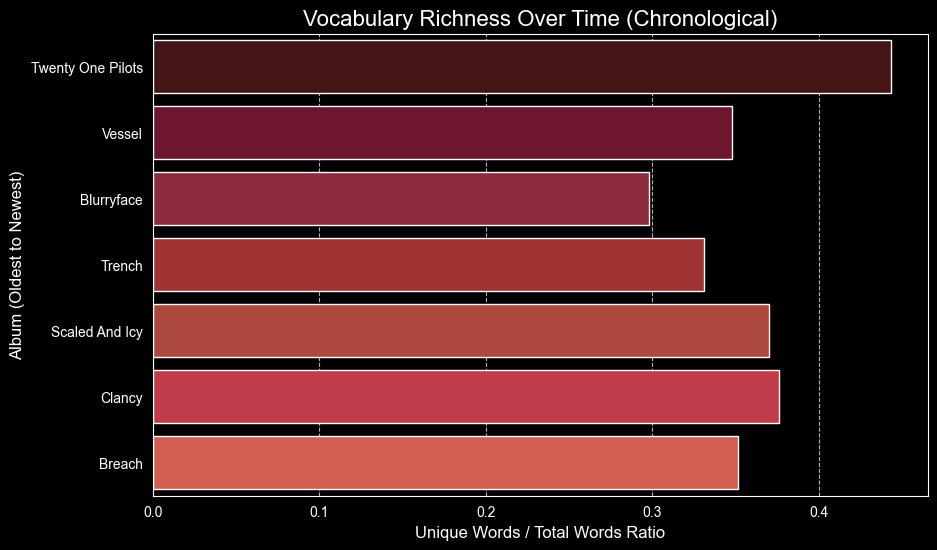

In [1747]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_diversity(text):
    words = str(text).lower().split()
    if len(words) == 0: return 0
    return len(set(words)) / len(words)

# 2. Apply Diversity Calculation
df_combined['Lexical_Diversity'] = df_combined['Lyrics'].apply(calculate_diversity)

# 3. Create the Score Dataframe and map the years
# We don't use .sort_values() here because we want to control the order manually
diversity_scores = df_combined.groupby('album_name')['Lexical_Diversity'].mean().reset_index()
diversity_scores['Release_Year'] = diversity_scores['album_name'].map(release_dates)

# 4. Sort by Release_Year instead of the score
diversity_scores = diversity_scores.sort_values('Release_Year')

# 5. Define Colors (matching your warm palette)
warm_colors = ['#4A0E0E', '#7B0828', '#9B1B30', '#B22222', '#C0392B', '#D72638', '#E74C3C']

# 6. Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=diversity_scores,
    x='Lexical_Diversity',
    y='album_name',
    hue='album_name',
    palette=warm_colors,
    legend=False # Removes the redundant legend
)

plt.title('Vocabulary Richness Over Time (Chronological)', fontsize=16)
plt.xlabel('Unique Words / Total Words Ratio', fontsize=12)
plt.ylabel('Album (Oldest to Newest)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

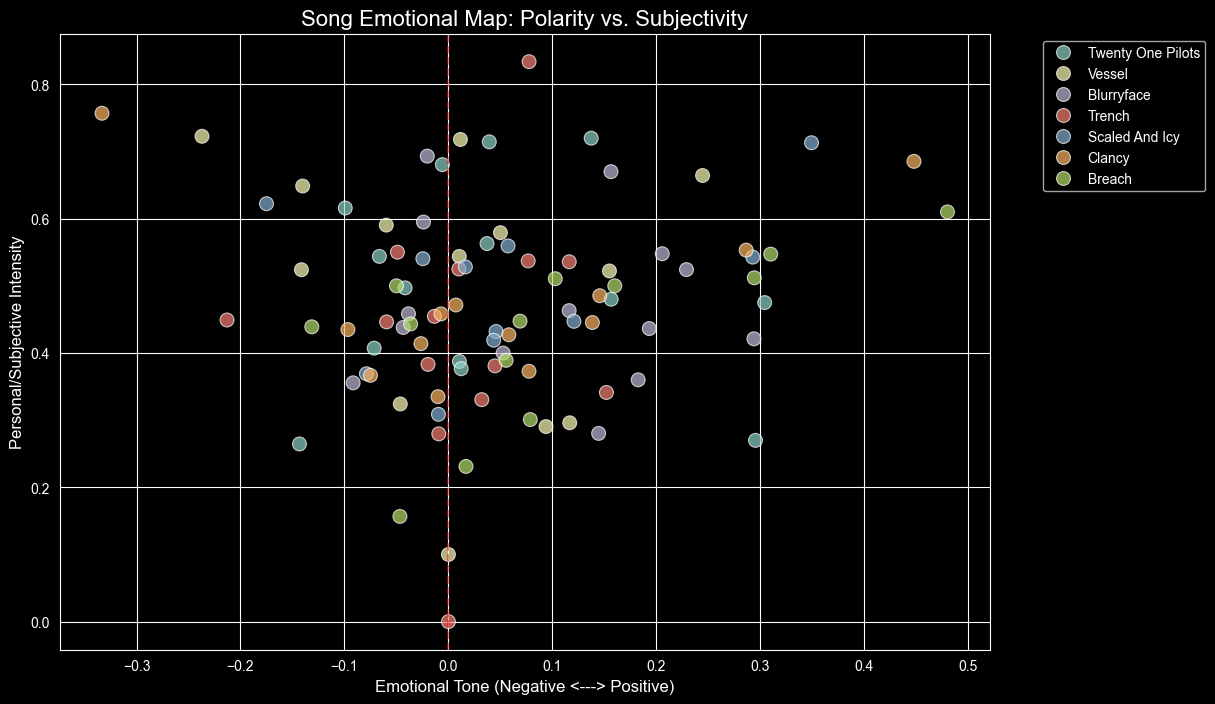

In [1748]:
from textblob import TextBlob

# Calculate scores
df_combined['Polarity'] = df_combined['Lyrics'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df_combined['Subjectivity'] = df_combined['Lyrics'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_combined, x='Polarity', y='Subjectivity', hue='album_name', s=100, alpha=0.7)

# Add a vertical line for neutral sentiment
plt.axvline(0, color='red', linestyle='--', alpha=0.5)
plt.title('Song Emotional Map: Polarity vs. Subjectivity', fontsize=16)
plt.xlabel('Emotional Tone (Negative <---> Positive)', fontsize=12)
plt.ylabel('Personal/Subjective Intensity', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/meredithsmith/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


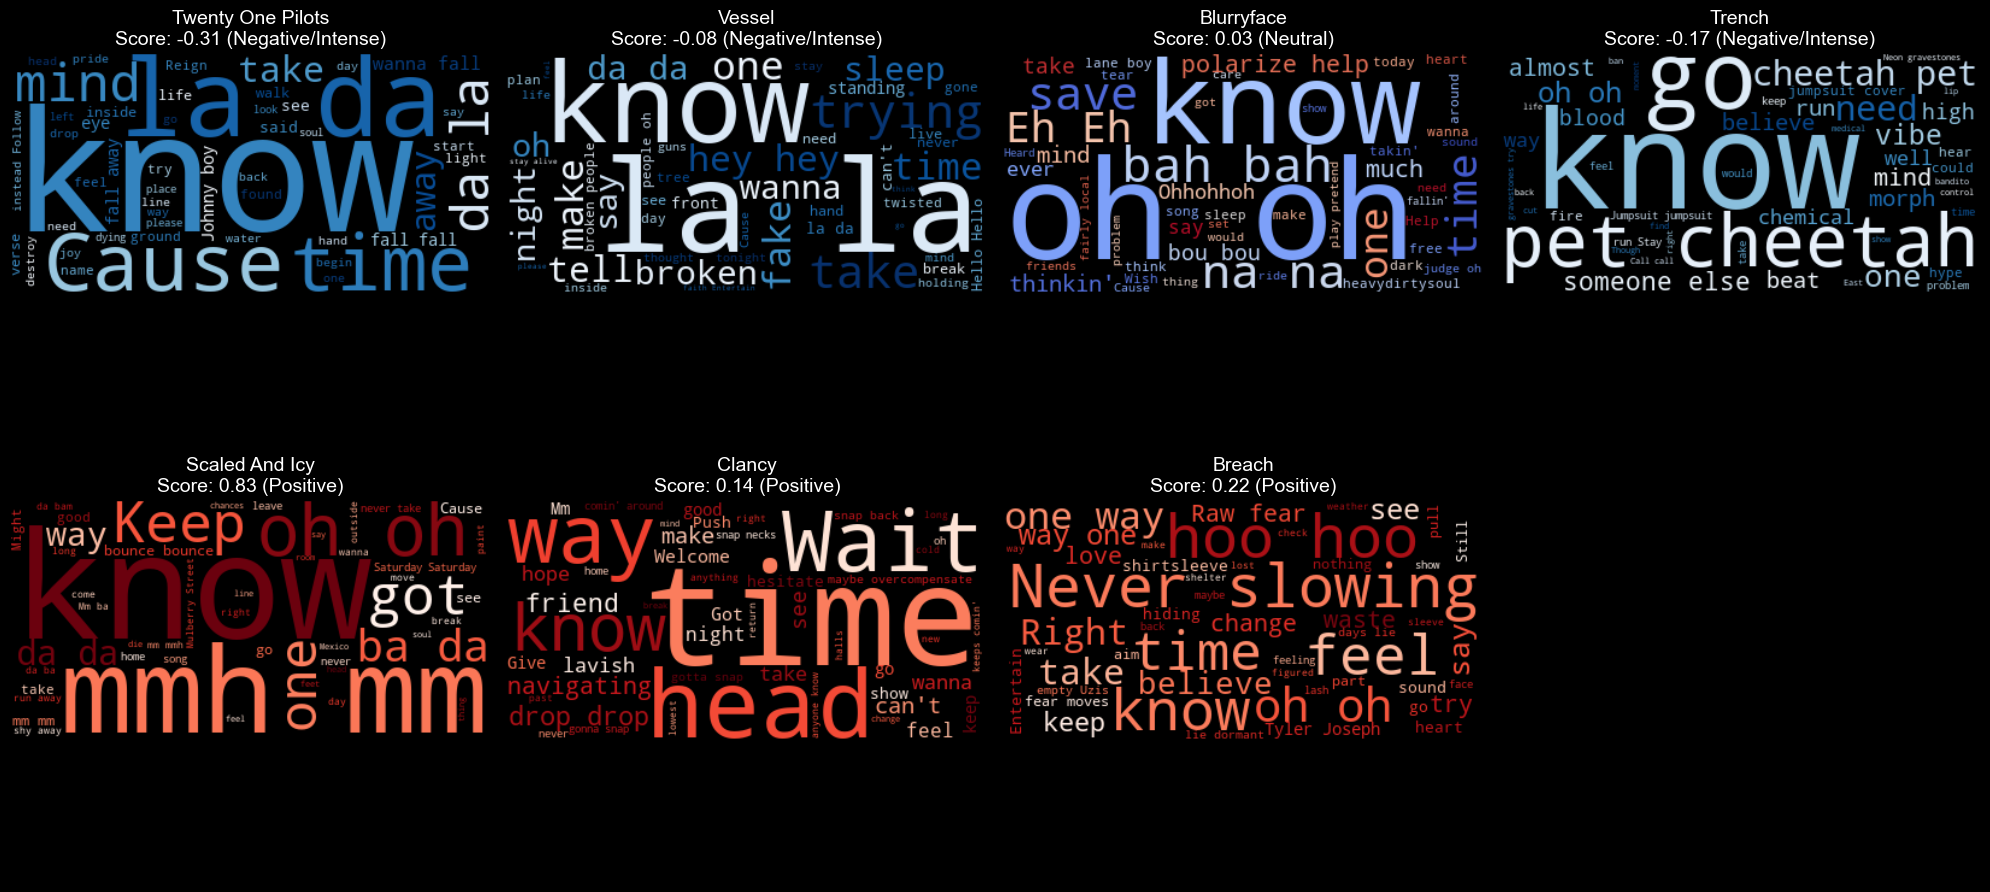

In [1749]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Ensure you have the sentiment lexicon
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# 1. Calculate Sentiment Score per Album
# We calculate the "Compound" score (-1 to 1) for each song, then average by album
df_combined['Sentiment'] = df_combined['Lyrics'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
album_sentiments = df_combined.groupby('album_name')['Sentiment'].mean()

# 2. Sort by Release Date (Using your previous mapping)
ordered_albums = [a for a in release_dates.keys() if a in album_sentiments.index]

# 3. Create a Grid of Word Clouds
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, album in enumerate(ordered_albums):
    # Filter lyrics for this album
    text = " ".join(df_combined[df_combined['album_name'] == album]['Lyrics'])
    score = album_sentiments[album]

    # Determine color scheme based on sentiment
    # Positive (>0.05) = Greens, Negative (< -0.05) = Reds, Neutral = Blues
    if score > 0.05:
        color_map = 'Reds'
        mood = "Positive"
    elif score < -0.05:
        color_map = 'Blues'
        mood = "Negative/Intense"
    else:
        color_map = 'coolwarm'
        mood = "Neutral"

    # Generate Word Cloud
    wc = WordCloud(

        colormap=color_map,
        max_words=50,
        stopwords=stop_words
    ).generate(text)

    # Plotting
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f"{album}\nScore: {score:.2f} ({mood})", fontsize=14)
    axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

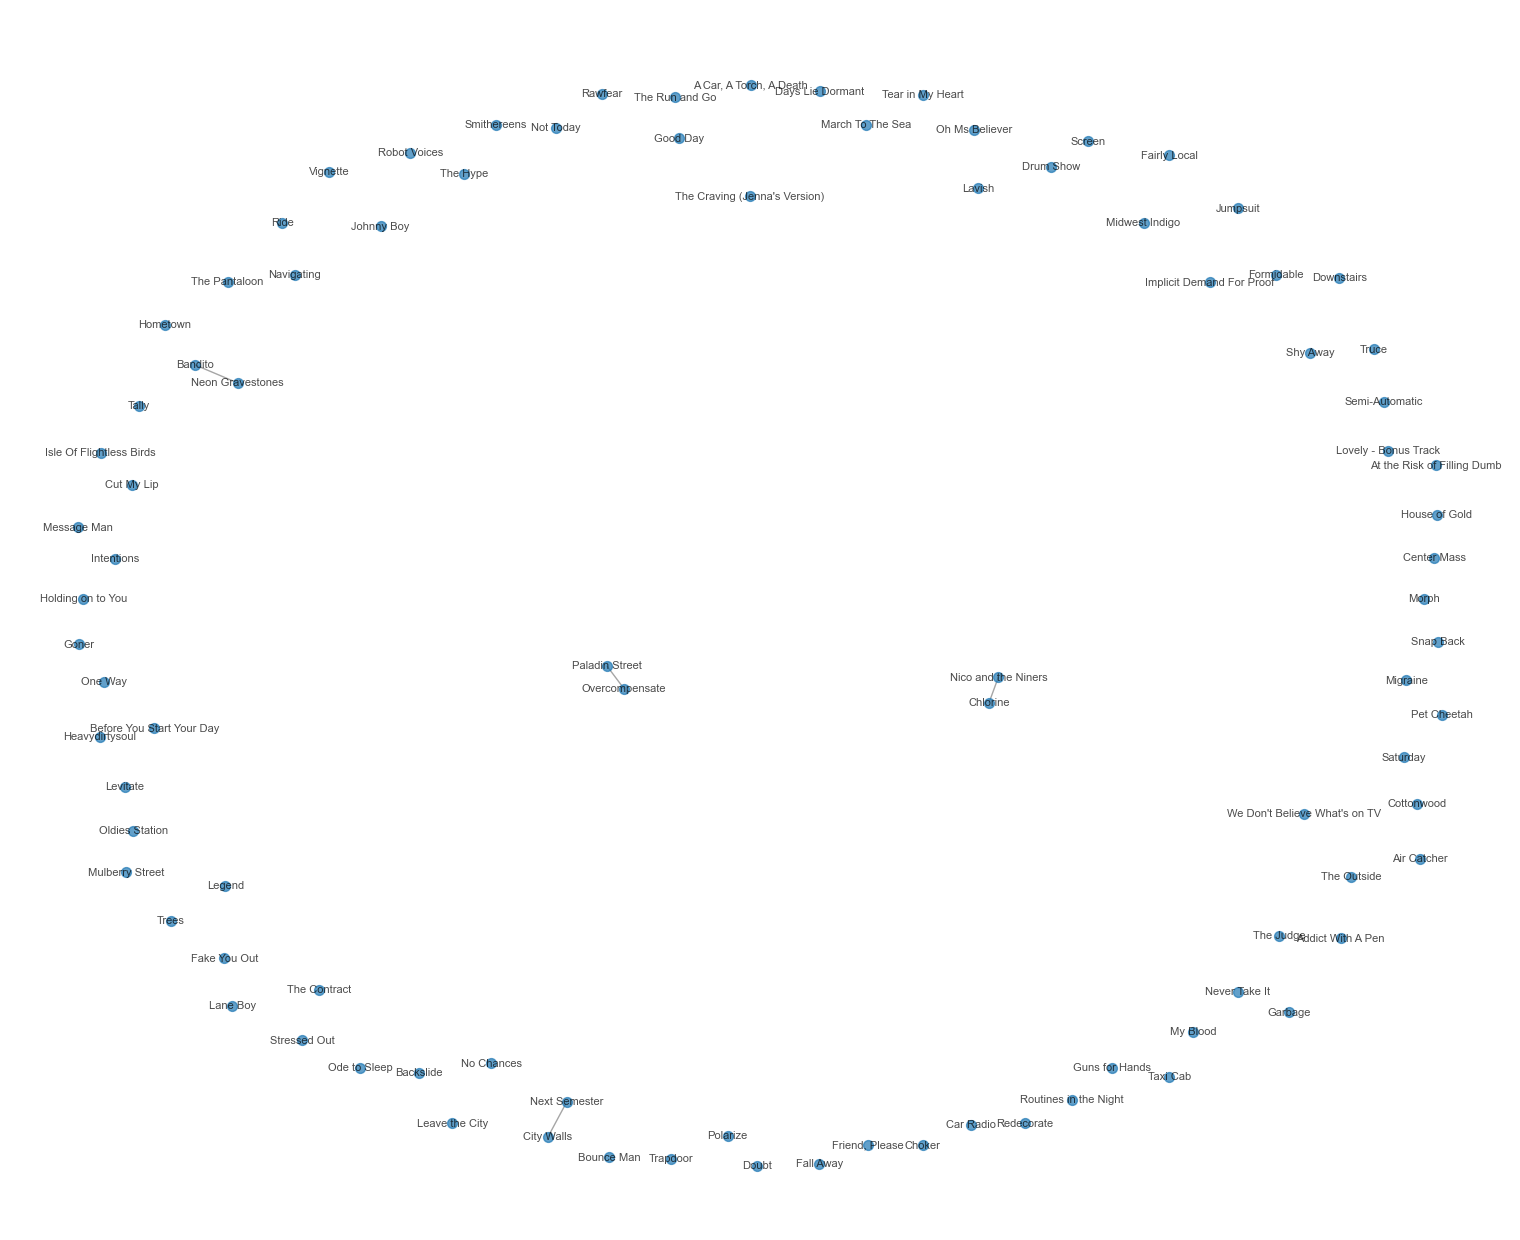

In [1750]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Define your "Lore" or "Target" words
lore_keywords = {'dema', 'bishop', 'clancy', 'torch', 'neon', 'vulture', 'rebel', 'bandito', 'yellow'}

# 2. Initialize the Graph
G = nx.Graph()

# 3. Add Nodes (Songs) and Edges (Shared Lore)
# We loop through your 92-song dataframe
for i, song_a in df_combined.iterrows():
    # Add the song as a node
    G.add_node(song_a['track_name'], album=song_a['album_name'])

    # Check for lore words in song_a
    words_a = set(str(song_a['Lyrics']).lower().split())
    shared_lore_a = words_a.intersection(lore_keywords)

    # Compare with every other song to find connections
    if shared_lore_a:
        for j, song_b in df_combined.iloc[i+1:].iterrows():
            words_b = set(str(song_b['Lyrics']).lower().split())
            shared_words = shared_lore_a.intersection(words_b)

            # If they share at least one lore word, create a connection
            if shared_words:
                G.add_edge(song_a['track_name'], song_b['track_name'], weight=len(shared_words))

# 4. Visualization
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G, k=0.15) # k controls the distance between nodes

# Color nodes by album (using your previous logic)
# This helps see if "Trench" songs cluster together
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, alpha=0.7, edge_color='gray')
plt.title("The Twenty One Pilots 'Lore' Network")
plt.show()

In [1751]:
from pyvis.network import Network

# Initialize Pyvis network
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True)

# Load the NetworkX graph into Pyvis
net.from_nx(G)
net.show("lore_network.html")

lore_network.html


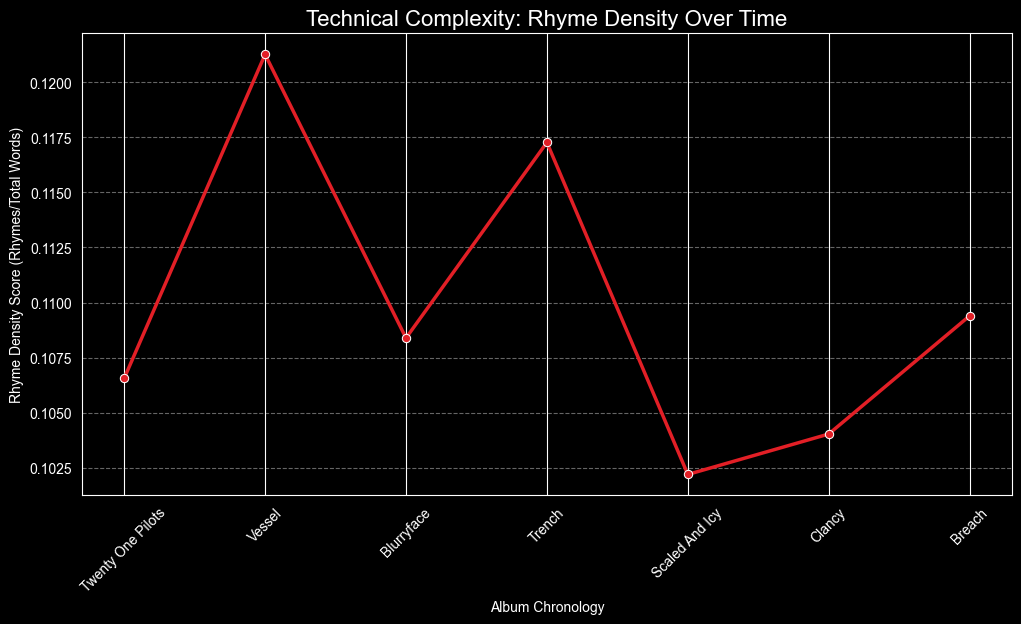

In [1752]:
import pandas as pd
import pronouncing
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_rhyme_score(text):
    # Clean text into tokens
    words = [w.lower().strip(".,!?\"") for w in str(text).split() if w.isalpha()]
    if not words:
        return 0

    rhyme_count = 0
    # We check each word against the next 10 words to find internal/near rhymes
    # (Typical of dense rap schemes like Levitate)
    for i in range(len(words)):
        current_word = words[i]
        # Get the phonetic rhyme parts for the current word
        current_rhymes = pronouncing.rhymes(current_word)

        # Look ahead at the next few words for a rhyme match
        look_ahead = words[i+1 : i+11]
        for future_word in look_ahead:
            if future_word in current_rhymes:
                rhyme_count += 1
                break # Count the word once if it rhymes with something nearby

    # Score = Rhyming words / Total words
    return rhyme_count / len(words)

# 1. Apply to your 92-song dataframe
df_combined['Rhyme_Density'] = df_combined['Lyrics'].apply(calculate_rhyme_score)

# 2. Group by Album and Sort Chronologically
# (Using your previous release_dates mapping)
album_rhyme_stats = df_combined.groupby('album_name')['Rhyme_Density'].mean().reset_index()
album_rhyme_stats['Year'] = album_rhyme_stats['album_name'].map(release_dates)
album_rhyme_stats = album_rhyme_stats.sort_values('Year')

# 3. Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=album_rhyme_stats, x='album_name', y='Rhyme_Density', marker='o', color='#E21F26', linewidth=2.5)

plt.title('Technical Complexity: Rhyme Density Over Time', fontsize=16)
plt.ylabel('Rhyme Density Score (Rhymes/Total Words)')
plt.xlabel('Album Chronology')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()